## Heat Conduction Simulation in a Metallic Plate

This code offers a visual simulation of heat conduction in a metallic plate using Python's scientific programming tools, particularly the NumPy and Matplotlib libraries. The simulation focuses on how temperature changes over time in response to established initial and boundary conditions.

**Problem Definition:**
Consideration is given to a metallic plate with specific thermal properties. The problem parameters are:

- Thermal diffusivity: 110
- Plate length: 50 mm
- Total simulation time: 4 seconds
- Number of discrete nodes on the plate: 20

**Initialization:**
The code begins by setting up the spatial and temporal discretization of the plate. It calculates the spatial step (`dx`) and the time step (`dt`) required for the simulation. Additionally, it sets the initial temperature of the plate, assuming the entire plate starts at a uniform temperature of 20 degrees Celsius.

**Boundary Conditions:**
Specific boundary conditions are applied by setting temperatures at the ends of the plate. In this case, the temperature at the left end is fixed at 100 degrees Celsius, and at the right end, it is also set to 100 degrees Celsius.

**Visualization with Plots:**
Matplotlib is used to visualize the temperature distribution on the plate over time. A pcolor plot is created to represent the temperature variation based on position and time. A color map (jet) is applied to indicate temperature on a color scale.

**Update Function for Animation:**
An `update` function is defined for use in the animation. This function calculates how the temperature distribution changes at each time step and updates the plot accordingly. The function prints the average temperature at each time step for additional tracking.



t: 0.000 [s], Average temperature: 32.00 Celsius
t: 0.000 [s], Average temperature: 34.00 Celsius
t: 0.028 [s], Average temperature: 36.00 Celsius
t: 0.057 [s], Average temperature: 37.50 Celsius
t: 0.085 [s], Average temperature: 39.00 Celsius
t: 0.114 [s], Average temperature: 40.25 Celsius
t: 0.142 [s], Average temperature: 41.50 Celsius
t: 0.170 [s], Average temperature: 42.59 Celsius
t: 0.199 [s], Average temperature: 43.69 Celsius
t: 0.227 [s], Average temperature: 44.67 Celsius
t: 0.256 [s], Average temperature: 45.66 Celsius
t: 0.284 [s], Average temperature: 46.56 Celsius
t: 0.312 [s], Average temperature: 47.46 Celsius
t: 0.341 [s], Average temperature: 48.30 Celsius
t: 0.369 [s], Average temperature: 49.14 Celsius
t: 0.398 [s], Average temperature: 49.92 Celsius
t: 0.426 [s], Average temperature: 50.71 Celsius
t: 0.455 [s], Average temperature: 51.45 Celsius
t: 0.483 [s], Average temperature: 52.19 Celsius
t: 0.511 [s], Average temperature: 52.90 Celsius
t: 0.540 [s], Averag

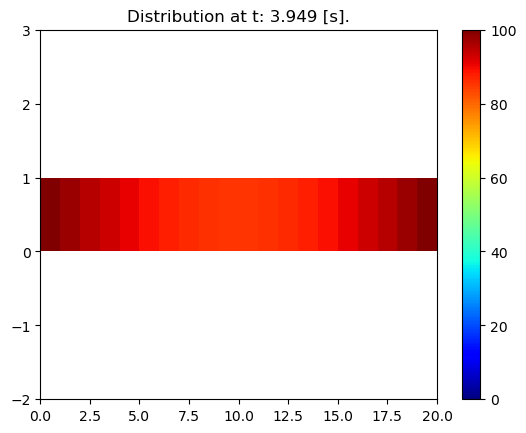

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the problem
thermal_diffusivity = 110
plate_length = 50  # mm
total_time = 4  # seconds
num_nodes = 20

# Initialization
dx = plate_length / num_nodes
dt = 0.5 * dx ** 2 / thermal_diffusivity
num_time_steps = int(total_time / dt)

temperature = np.full(num_nodes, 20.0)  # Plate is initially at 20 degrees C

# Boundary Conditions
temperature[0] = 100
temperature[-1] = 100

# Visualization with a plot
fig, axis = plt.subplots()
pcm = axis.pcolormesh([temperature], cmap=plt.cm.jet, vmin=0, vmax=100)
plt.colorbar(pcm, ax=axis)
axis.set_ylim([-2, 3])

# Function to update plot in animation
def update(frame, u):
    w = u.copy()
    u[1:-1] = dt * thermal_diffusivity * (w[:-2] - 2 * w[1:-1] + w[2:]) / dx ** 2 + w[1:-1]

    print("t: {:.3f} [s], Average temperature: {:.2f} Celsius".format(frame * dt, np.average(u)))

    pcm.set_array([u])
    axis.set_title("Distribution at t: {:.3f} [s].".format(frame * dt))

# Create the animation
num_frames = num_time_steps
animation = FuncAnimation(fig, update, frames=num_frames, fargs=(temperature,), interval=50, blit=False)

# Save the animation as a GIF
animation.save('T_animation.gif', writer='pillow', fps=30)

plt.show()